In [106]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [107]:
def lg(mu, n, ybar):
    mu2 = mu**2
    return n * (ybar * mu - mu2 / 2.0) - math.log(1 + mu2)

In [108]:
def mh(n, ybar, n_iter, mu_init, cand_sd):
    ## Random-Walk Metropolis-Hastings algorithm
  
    ## step 1, initialize
    mu_out = np.zeros(n_iter)
    accpt = 0
    mu_now = mu_init
    lg_now = lg(mu=mu_now, n=n, ybar=ybar)
  
    ## step 2, iterate
    for i in range(n_iter):
        ## step 2a
        mu_cand = np.random.normal(mu_now, cand_sd) # draw a candidate

        ## step 2b
        lg_cand = lg(mu=mu_cand, n=n, ybar=ybar) # evaluate log of g with the candidate
        lalpha = lg_cand - lg_now # log of acceptance ratio
        alpha = math.exp(lalpha)

        ## step 2c
        u = np.random.uniform() # draw a uniform variable which will be less than alpha with probability min(1, alpha)
        if u < alpha:  # then accept the candidate
            mu_now = mu_cand
            accpt = accpt + 1 # to keep track of acceptance
            lg_now = lg_cand

        ## collect results
        mu_out[i] = mu_now # save this iteration's value of mu
        

    class Result:
        pass
    
    res = Result()
    res.mu = mu_out
    res.accpt = accpt/n_iter
    
    return res

In [109]:
y = np.array([1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9])
ybar = np.mean(y)
n = len(y)

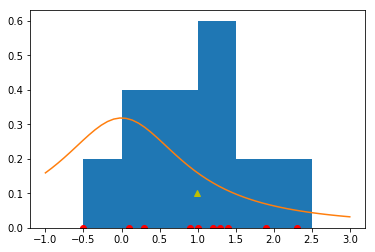

In [110]:
bins = np.linspace(-1, 3, 9)
bins[4]+=1e-5 # a liitle hack for matchng original plotting
hist = plt.hist(y, normed=True, bins=bins)
x = np.linspace(-1, 3, 50)
curv = plt.plot(x, st.t.pdf(x, df=1))
points = plt.plot(y, np.zeros(len(y)), 'ro')
data_mean = plt.plot(ybar, 0.1, 'y^')

In [111]:
np.random.seed(1)
 # set the random seed for reproducibility
post = mh(n=n, ybar=ybar, n_iter=1000, mu_init=0.0, cand_sd=3.0)

accept rate = 0.118


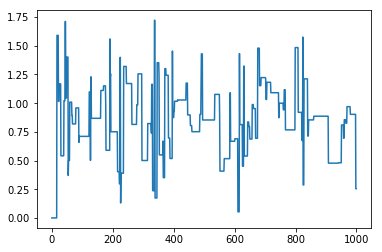

In [112]:
plt.plot(post.mu)
print('accept rate =', post.accpt)

accept rate = 0.949


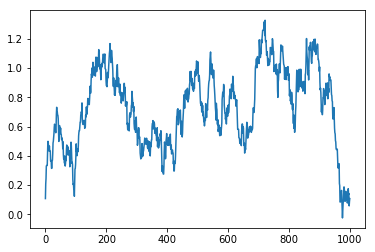

In [113]:
post = mh(n=n, ybar=ybar, n_iter=1000, mu_init=0.0, cand_sd=0.05)
plt.plot(post.mu)
print('accept rate =', post.accpt)

accept rate = 0.407


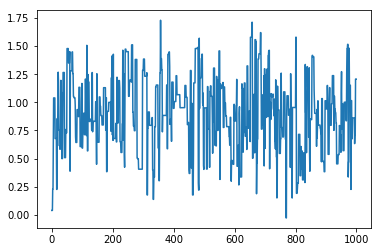

In [114]:
post = mh(n=n, ybar=ybar, n_iter=1000, mu_init=0.0, cand_sd=0.9)
plt.plot(post.mu)
print('accept rate =', post.accpt)

accept rate = 0.393


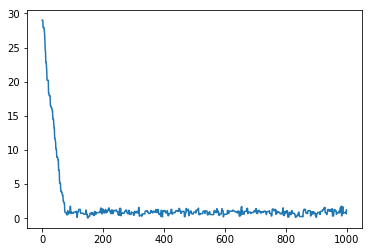

In [115]:
post = mh(n=n, ybar=ybar, n_iter=1000, mu_init=30.0, cand_sd=0.9)
plt.plot(post.mu)
print('accept rate =', post.accpt)

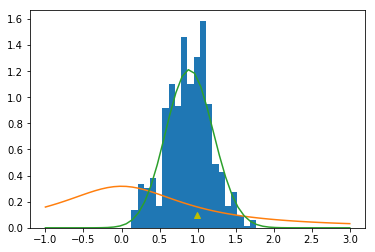

In [116]:
post.mu_keep = post.mu[200:] # discard the first 200 samples
hist = plt.hist(post.mu_keep, normed=True, bins=20)# plot density estimate of the posterior
x = np.linspace(-1, 3, 50)
curv = plt.plot(x, st.t.pdf(x, df=1))# prior for mu
data_mean = plt.plot(ybar, 0.1, 'y^')
curv2 = plt.plot(x, [0.017*math.exp(lg(mu=x_, n=n, ybar=ybar)) for x_ in x ])# prior for mu

In [117]:
print('post mu mean =', np.mean(post.mu_keep))

post mu mean = 0.880265605016
